In [ ]:
# Load Data: Load the dataset into a DataFrame using pandas.

# Separate Target and Features:

# Target: Diagnosis / Condition (the label you want to predict).
# Features: Everything else.
# Encode Categorical Features: Use one-hot encoding to convert categorical columns (like Gender, Symptoms, etc.) into numerical values.

# Scale Numerical Features: Standardize the numerical features (like Age, Duration, etc.) to make them easier for the model to process.

# Split the Data: Divide the dataset into training data (80%) and test data (20%).

# Train the Model: Use a logistic regression model to learn from the training data.

# Make Predictions: Use the trained model to predict the target on the test data.

# Evaluate the Model: Check the accuracy and classification metrics (like precision and recall) to see how well the model performs.

In [ ]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples you want
n_samples = 1000

# 1. User ID (just a sequence of numbers)
user_id = np.arange(1, n_samples+1)

# 2. Age (random ages between 18 and 70)
age = np.random.randint(18, 70, size=n_samples)

# 3. Gender (random selection between Male, Female, Non-binary, etc.)
gender = np.random.choice(['Male', 'Female', 'Non-binary', 'Other'], size=n_samples)

# 4. Symptoms (random selection from a list of common symptoms)
symptoms = np.random.choice([
    'feeling anxious', 'trouble sleeping', 'feeling sad', 'lack of concentration',
    'feeling overwhelmed', 'panic attacks', 'loss of interest in activities',
    'feeling irritable', 'excessive worry'], size=n_samples)

# 5. Duration (randomly assign how long the symptoms have been present, in weeks)
duration = np.random.randint(1, 52, size=n_samples)

# 6. Previous Diagnosis (random selection from possible conditions)
previous_diagnosis = np.random.choice([
    'None', 'Depression', 'Anxiety', 'Bipolar Disorder', 'PTSD', 'OCD'], size=n_samples)

# 7. Therapy History (whether the user has had therapy before, Yes/No)
therapy_history = np.random.choice(['Yes', 'No'], size=n_samples)

# 8. Medication (whether the user is on medication, Yes/No)
medication = np.random.choice(['Yes', 'No'], size=n_samples)

# 9. Diagnosis / Condition (predicted condition based on symptoms)
diagnosis_condition = np.random.choice([
    'Depression', 'Anxiety', 'Stress', 'Panic Disorder', 'Burnout'], size=n_samples)

# 10. Suggested Therapy (types of therapy)
suggested_therapy = np.random.choice([
    'Cognitive Behavioral Therapy', 'Mindfulness-Based Therapy',
    'Psychotherapy', 'Support Groups', 'No Therapy Needed'], size=n_samples)

# 11. Self-care Advice (random advice options)
self_care_advice = np.random.choice([
    'Exercise', 'Journaling', 'Meditation', 'Breathing Exercises',
    'Talk to a Friend', 'Take Breaks'], size=n_samples)

# 12. Urgency Level (random levels of urgency)
urgency_level = np.random.choice(['Low', 'Moderate', 'High', 'Critical'], size=n_samples)

# 13. Mood (optional, scale from 1 to 10)
mood = np.random.randint(1, 11, size=n_samples)

# 14. Stress Level (optional, scale from 1 to 10)
stress_level = np.random.randint(1, 11, size=n_samples)

# Combine into a DataFrame
data = pd.DataFrame({
    'User ID': user_id,
    'Age': age,
    'Gender': gender,
    'Symptoms': symptoms,
    'Duration (weeks)': duration,
    'Previous Diagnosis': previous_diagnosis,
    'Therapy History': therapy_history,
    'Medication': medication,
    'Diagnosis / Condition': diagnosis_condition,
    'Suggested Therapy': suggested_therapy,
    'Self-care Advice': self_care_advice,
    'Urgency Level': urgency_level,
    'Mood': mood,
    'Stress Level': stress_level
})

# View the first 5 rows of the synthetic dataset
# print(data.head())

# Optionally, save to CSV
data.to_csv('synthetic_mental_health_data.csv', index=False)


In [ ]:
# Save the synthetic dataset to a CSV file
data.to_csv('synthetic_mental_health_data.csv', index=False)


In [ ]:
import pandas as pd

# Load the dataset from the CSV file
data = pd.read_csv('synthetic_mental_health_data.csv')

# View the first few rows of the dataset
print(data.head())


   User ID  Age      Gender           Symptoms  Duration (weeks)  \
0        1   56  Non-binary    feeling anxious                21   
1        2   69  Non-binary   trouble sleeping                42   
2        3   46  Non-binary  feeling irritable                26   
3        4   32       Other        feeling sad                44   
4        5   60        Male        feeling sad                14   

  Previous Diagnosis Therapy History Medication Diagnosis / Condition  \
0   Bipolar Disorder             Yes         No            Depression   
1                NaN             Yes        Yes        Panic Disorder   
2               PTSD             Yes        Yes                Stress   
3         Depression              No        Yes               Anxiety   
4               PTSD              No         No        Panic Disorder   

              Suggested Therapy Self-care Advice Urgency Level  Mood  \
0  Cognitive Behavioral Therapy         Exercise           Low     8   
1       

In [ ]:
#rename
# Remove leading/trailing spaces from column names (if any)
data.columns = data.columns.str.strip()

# Check if "Diagnosis / Condition" column exists after stripping spaces
print(data.columns)

# Now proceed with your feature/target selection
X = data.drop(['Diagnosis / Condition'], axis=1)  # Features
y = data['Diagnosis / Condition']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the processed data
print(X_train.head())
print(y_train.head())

Index(['User ID', 'Age', 'Gender', 'Symptoms', 'Duration (weeks)',
       'Previous Diagnosis', 'Therapy History', 'Medication',
       'Diagnosis / Condition', 'Suggested Therapy', 'Self-care Advice',
       'Urgency Level', 'Mood', 'Stress Level'],
      dtype='object')
     User ID  Age      Gender             Symptoms  Duration (weeks)  \
29        30   42       Other     trouble sleeping                24   
535      536   22        Male          feeling sad                17   
695      696   65       Other  feeling overwhelmed                22   
557      558   29        Male    feeling irritable                35   
836      837   54  Non-binary          feeling sad                 3   

    Previous Diagnosis Therapy History Medication  \
29    Bipolar Disorder              No        Yes   
535            Anxiety             Yes         No   
695            Anxiety             Yes        Yes   
557                OCD             Yes        Yes   
836         Depression       

In [ ]:
# Separate the target variable (Diagnosis / Condition)
y = data['Diagnosis / Condition']

# Drop the target variable from the DataFrame to create the features DataFrame
X = data.drop(['Diagnosis / Condition'], axis=1)

# View the shapes of X and y to confirm separation
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1000, 13)
Target shape: (1000,)


In [ ]:
# Specify the categorical columns to be encoded
categorical_columns = ['Gender', 'Symptoms', 'Previous Diagnosis',
                       'Therapy History', 'Medication',
                       'Suggested Therapy', 'Self-care Advice',
                       'Urgency Level']

# Apply one-hot encoding to the categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# View the first few rows of the encoded features
print(X_encoded.head())


   User ID  Age  Duration (weeks)  Mood  Stress Level  Gender_Male  \
0        1   56                21     8            10        False   
1        2   69                42     7             2        False   
2        3   46                26     3             2        False   
3        4   32                44     8             4        False   
4        5   60                14     2             9         True   

   Gender_Non-binary  Gender_Other  Symptoms_feeling anxious  \
0               True         False                      True   
1               True         False                     False   
2               True         False                     False   
3              False          True                     False   
4              False         False                     False   

   Symptoms_feeling irritable  ...  Suggested Therapy_Psychotherapy  \
0                       False  ...                            False   
1                       False  ...                  

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Specify the numerical columns to be scaled
numerical_columns = ['Age', 'Duration (weeks)', 'Mood', 'Stress Level']

# Fit the scaler on the numerical columns and transform them
X_encoded[numerical_columns] = scaler.fit_transform(X_encoded[numerical_columns])

# View the first few rows of the scaled features
print(X_encoded.head())


   User ID       Age  Duration (weeks)      Mood  Stress Level  Gender_Male  \
0        1  0.812959         -0.374661  0.855581      1.519688        False   
1        2  1.680578          1.056123  0.518074     -1.275141        False   
2        3  0.145560         -0.033998 -0.831955     -1.275141        False   
3        4 -0.788799          1.192389  0.855581     -0.576434        False   
4        5  1.079919         -0.851589 -1.169462      1.170335         True   

   Gender_Non-binary  Gender_Other  Symptoms_feeling anxious  \
0               True         False                      True   
1               True         False                     False   
2               True         False                     False   
3              False          True                     False   
4              False         False                     False   

   Symptoms_feeling irritable  ...  Suggested Therapy_Psychotherapy  \
0                       False  ...                            False  

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# View the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (800, 34) (800,)
Test set shape: (200, 34) (200,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Confirm that the model has been trained
print("Model trained successfully!")


Model trained successfully!


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Display the first few predictions
print("Predictions on the test data:", y_pred[:10])


Predictions on the test data: ['Depression' 'Stress' 'Panic Disorder' 'Depression' 'Burnout'
 'Depression' 'Anxiety' 'Depression' 'Anxiety' 'Stress']


In [ ]:
print("Predictions made successfully!")

Predictions made successfully!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy Score: 0.195
Classification Report:
                 precision    recall  f1-score   support

       Anxiety       0.26      0.43      0.32        44
       Burnout       0.06      0.05      0.06        39
    Depression       0.18      0.28      0.22        32
Panic Disorder       0.16      0.09      0.11        35
        Stress       0.23      0.12      0.16        50

      accuracy                           0.20       200
     macro avg       0.18      0.19      0.17       200
  weighted avg       0.18      0.20      0.18       200



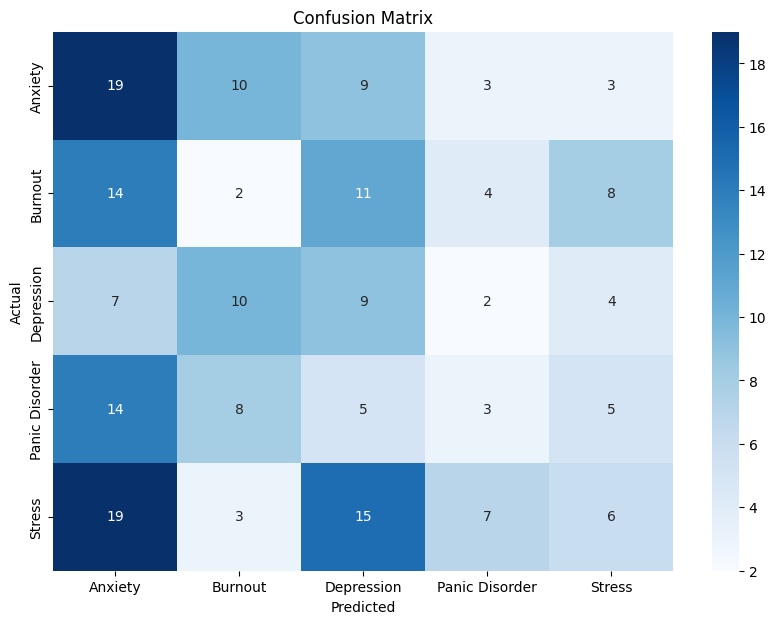

In [ ]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get the unique classes from the target variable
classes = np.unique(y)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Code to Analyze the Confusion Matrix
import numpy as np

# Calculate precision and recall for each class
precision = {}
recall = {}
for i, class_name in enumerate(classes):
    tp = conf_matrix[i, i]  # True Positive
    fp = np.sum(conf_matrix[:, i]) - tp  # False Positive
    fn = np.sum(conf_matrix[i, :]) - tp  # False Negative

    precision[class_name] = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall[class_name] = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results
for class_name in classes:
    print(f"{class_name}: Precision = {precision[class_name]:.2f}, Recall = {recall[class_name]:.2f}")


Anxiety: Precision = 0.26, Recall = 0.43
Burnout: Precision = 0.06, Recall = 0.05
Depression: Precision = 0.18, Recall = 0.28
Panic Disorder: Precision = 0.16, Recall = 0.09
Stress: Precision = 0.23, Recall = 0.12


In [ ]:
# Get the feature names after one-hot encoding
feature_names = X.columns

# Check lengths
print("Number of features:", len(feature_names))
print("Number of coefficients per class:", coefficients.shape[1])


Number of features: 13
Number of coefficients per class: 34


In [ ]:
print(X.columns.tolist())


['User ID', 'Age', 'Gender', 'Symptoms', 'Duration (weeks)', 'Previous Diagnosis', 'Therapy History', 'Medication', 'Suggested Therapy', 'Self-care Advice', 'Urgency Level', 'Mood', 'Stress Level']


In [ ]:
def preprocess_input(input_data):
    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # One-hot encode categorical features
    categorical_columns = ['Gender', 'Symptoms', 'Previous Diagnosis',
                           'Therapy History', 'Medication',
                           'Suggested Therapy', 'Self-care Advice',
                           'Urgency Level']

    # One-hot encoding
    input_df = pd.get_dummies(input_df, columns=categorical_columns, drop_first=True)

    # Reindex to match training data columns, filling missing ones with 0
    input_df = input_df.reindex(columns=X.columns, fill_value=0)

    # Scale numerical features
    numerical_columns = ['Age', 'Duration (weeks)', 'Mood', 'Stress Level']
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    return input_df


In [ ]:
import pandas as pd

# Sample input
sample_input = {
    'User ID': 1,  # This can be arbitrary for prediction
    'Age': 25,
    'Gender': 'Female',  # Ensure this matches your training data
    'Symptoms': 'Anxiety',  # Ensure this matches your training data
    'Duration (weeks)': 4,
    'Previous Diagnosis': 'None',  # Ensure this matches your training data
    'Therapy History': 'No',  # Ensure this matches your training data
    'Medication': 'No',  # Ensure this matches your training data
    'Suggested Therapy': 'Cognitive Behavioral Therapy',  # Ensure this matches your training data
    'Self-care Advice': 'Practice mindfulness',  # Ensure this matches your training data
    'Urgency Level': 'Medium',  # Ensure this matches your training data
    'Mood': 7,
    'Stress Level': 5
}

# Preprocess the input
def preprocess_input(input_data):
    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # One-hot encode categorical features
    input_df = pd.get_dummies(input_df, drop_first=True)

    # Ensure the same columns as the model was trained with
    missing_cols = set(X_train.columns) - set(input_df.columns)
    for c in missing_cols:
        input_df[c] = 0  # Add missing columns with default value 0

    # Reorder columns to match the model's input
    input_df = input_df[X_train.columns]

    return input_df

# Preprocess the input
processed_input = preprocess_input(sample_input)

# Make prediction
prediction = model.predict(processed_input)
print("Prediction:", prediction)


Prediction: ['Stress']


In [ ]:
def get_user_input():
    # Simulate user input collection
    sample_input = {
        'User ID': 1,
        'Age': int(input("Enter age: ")),
        'Gender': input("Enter gender: "),
        'Symptoms': input("Enter symptoms: "),
        'Duration (weeks)': int(input("Enter duration in weeks: ")),
        'Previous Diagnosis': input("Enter previous diagnosis: "),
        'Therapy History': input("Enter therapy history: "),
        'Medication': input("Enter if on medication: "),
        'Suggested Therapy': input("Enter suggested therapy: "),
        'Self-care Advice': input("Enter self-care advice: "),
        'Urgency Level': input("Enter urgency level: "),
        'Mood': int(input("Enter mood (1-10): ")),
        'Stress Level': int(input("Enter stress level (1-10): "))
    }
    return sample_input

# Then you can use the input to predict
user_input = get_user_input()
processed_input = preprocess_input(user_input)  # Ensure you have the preprocessing function defined
prediction = model.predict(processed_input)
print("Prediction:", prediction)
